In [6]:
#Author Alex J. Yang, alexjieyang@outlook.com

import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path1 = 
path2 = 

In [8]:
df1 = pd.read_csv(path1)
df2 = pd.read_excel(path2)

In [10]:
df1.head(3)

,au,pub_num,tc,h,g,DC,CC,dh,ch,TCD,TC,TD,CitCDP
0,p. bassi,4,57,3,4,18,39,2,2,0.092404,0.258095,0.165691,2.056634
1,cl. gabriel,4,15,2,4,0,15,0,2,-0.027606,0.000000,0.027606,1.988942
2,m. j. norgett,1,14,1,1,5,9,1,1,-0.007812,0.009766,0.017578,0.498656


In [12]:
df2.head(3)

,au,name,pubNum,award
0,t. maurice rice,Thomas Maurice Rice,162,Nobel
1,steven weinberg,steven weinberg,133,Nobel
2,walter kohn,walter kohn,115,Nobel


In [13]:
df2['pub_num'] = df2['au'].map(dict(zip(df1['au'] , df1['pub_num'])))
df2['tc'] = df2['au'].map(dict(zip(df1['au'] , df1['tc'])))
df2['h'] = df2['au'].map(dict(zip(df1['au'] , df1['h'])))
df2['g'] = df2['au'].map(dict(zip(df1['au'] , df1['h'])))
df2['DC'] = df2['au'].map(dict(zip(df1['au'] , df1['DC'])))
df2['CC'] = df2['au'].map(dict(zip(df1['au'] , df1['CC'])))
df2['dh'] = df2['au'].map(dict(zip(df1['au'] , df1['dh'])))
df2['ch'] = df2['au'].map(dict(zip(df1['au'] , df1['ch'])))

In [14]:
df1['auu'] = df1['au'].apply(lambda x:x.replace(' ' , ''))
df2['auu'] = df2['au'].apply(lambda x:x.replace(' ' , ''))

# Visulize

In [18]:
def draw_bar(df1 , va ,label, savepath,ytick):
    f, ax = plt.subplots(figsize=(7, 7))
    
    sns.set_theme(style="ticks")
    sns.barplot(data=df1, x="type", y=va , errwidth=3, capsize=.2,palette=['#6E2C00','#154360'])
    
    plt.xticks(size = 30)
    plt.yticks(ytick,size = 30)
    plt.xlabel(label,fontsize = 30)
    plt.ylabel('',fontsize = 0)

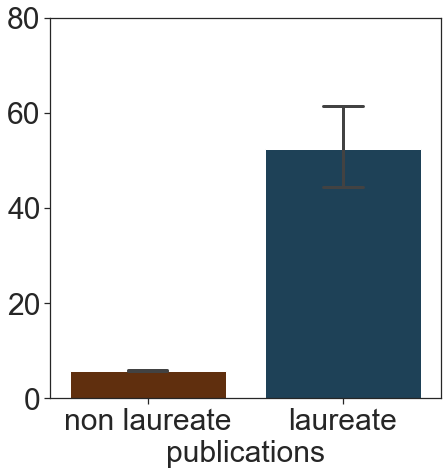

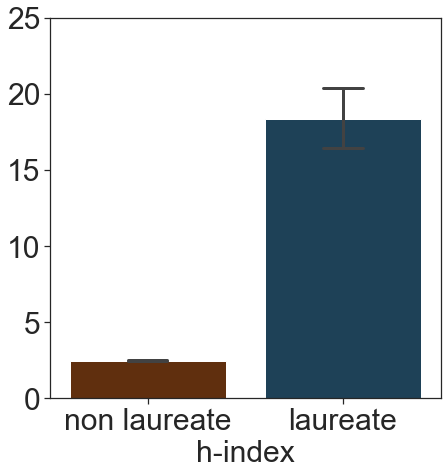

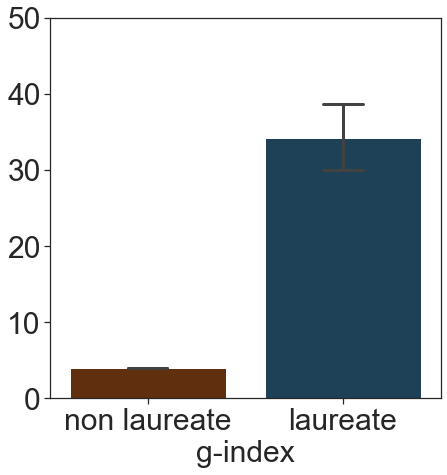

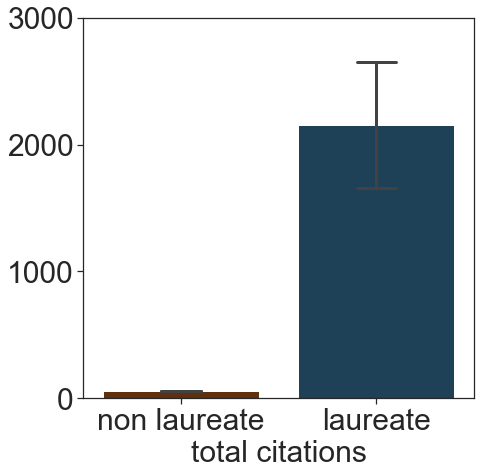

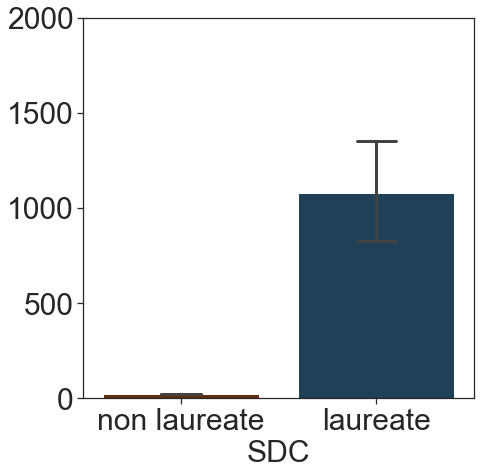

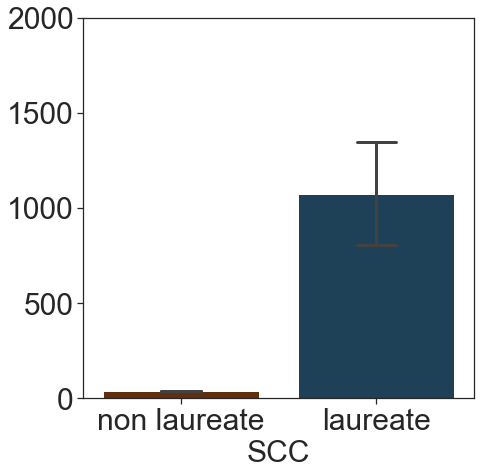

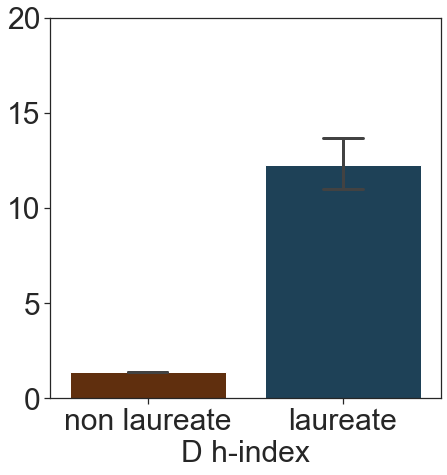

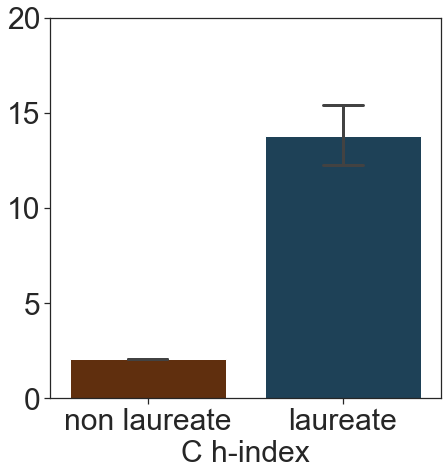

In [19]:
labels = ['publications','h-index','g-index','total citations','SDC','SCC','D h-index','C h-index']
valst = [ 'pub_num', 'h','g','tc', 'DC', 'CC','dh', 'ch']
yticks = [[0,20,40,60,80],[0,5,10,15,20,25],[0,10,20,30,40,50],[0,1000,2000,3000],[0,500,1000,1500,2000],[0,500,1000,1500,2000],[0,5,10,15,20],[0,5,10,15,20]]
for m in range(len(valst)):
    draw_bar(df1 ,valst[m], labels[m] , valst[m],yticks[m])

In [21]:
for m in [ 'pub_num', 'h','g','tc', 'DC', 'CC','dh', 'ch']:
    print(m , scipy.stats.ttest_ind(df1[df1['type']=='laureate'][m].values , df1[df1['type']=='non laureate'][m].values,equal_var=False,alternative='two-sided'))

pub_num Ttest_indResult(statistic=10.95584000705305, pvalue=3.759940545716637e-20)
h Ttest_indResult(statistic=15.176570246194581, pvalue=1.751944661772717e-30)
g Ttest_indResult(statistic=13.856298160321625, pvalue=2.620869430310201e-27)
tc Ttest_indResult(statistic=8.04500301236784, pvalue=4.869236660351837e-13)
DC Ttest_indResult(statistic=7.7679952334310745, pvalue=2.177371316891204e-12)
CC Ttest_indResult(statistic=7.412098766550133, pvalue=1.4529814853607694e-11)
dh Ttest_indResult(statistic=15.76661161879445, pvalue=7.074498091272144e-32)
ch Ttest_indResult(statistic=14.265755784898538, pvalue=2.666511841491177e-28)


In [23]:
df1[df1['type']=='laureate'][[ 'pub_num', 'h','g','tc', 'DC', 'CC','dh', 'ch']].describe().round(2)

,pub_num,h,g,tc,DC,CC,dh,ch
count,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,52.45,18.35,34.14,2151.08,1078.24,1072.84,12.25,13.80
std,48.51,11.93,24.82,2963.57,1552.51,1589.57,7.85,9.37
min,5.00,3.00,5.00,102.00,15.00,20.00,2.00,2.00
25%,20.00,9.00,14.00,316.75,143.75,166.25,6.00,7.00
50%,42.00,17.00,28.50,1162.50,536.00,510.00,10.50,12.00
75%,63.00,24.00,46.00,2416.75,1229.50,1254.25,15.75,17.75
max,307.00,58.00,118.00,15906.00,9361.00,8744.00,42.00,47.00


In [25]:
df1[df1['type']=='non laureate'][[ 'pub_num', 'h','g','tc', 'DC', 'CC','dh', 'ch']].describe().round(2)

,pub_num,h,g,tc,DC,CC,dh,ch
count,233956.00,233956.00,233956.00,233956.0,233956.00,233956.00,233956.00,233956.00
mean,5.83,2.48,3.97,60.0,20.52,39.49,1.40,2.08
std,12.39,3.18,5.49,218.0,85.00,142.54,1.79,2.69
min,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,2.0,0.00,1.00,0.00,1.00
50%,2.00,1.00,2.00,9.0,2.00,5.00,1.00,1.00
75%,5.00,3.00,4.00,36.0,11.00,24.00,2.00,3.00
max,491.00,53.00,101.00,10494.0,4089.00,7408.00,29.00,46.00
